In [ ]:
import pickle

#Unpickling the file
with open('/content/images.p','rb') as f:
  images=pickle.load(f)

with open("/content/labels.p","rb") as f:
  labels=pickle.load(f)


In [ ]:
print(images.shape)
print(labels.shape)

(395, 100, 100)
(395,)


In [ ]:
set(labels)

{'Abhishek', 'Aniket', 'Pratisha', 'Samikhya'}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2, 3}

In [ ]:
le.inverse_transform([0,1,2,3])

array(['Abhishek', 'Aniket', 'Pratisha', 'Samikhya'], dtype='<U8')

In [ ]:
import numpy as np
a=len(set(labels))
print("Number of Persons : ",a)
b=le.inverse_transform(np.arange(a))
for i in range(len(b)):
  print(i,"-->",b[i])

Number of Persons :  4
0 --> Abhishek
1 --> Aniket
2 --> Pratisha
3 --> Samikhya


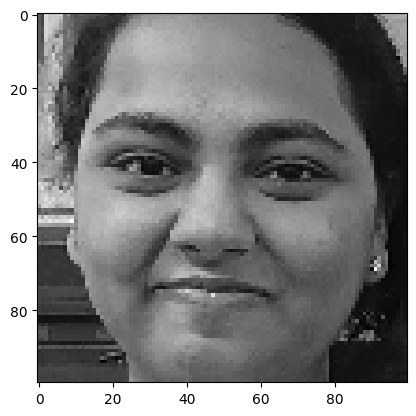

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[211],cmap="gray")
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img

In [ ]:
images=np.array(list(map(preprocessing,images)))
print('Input Shape',images.shape)

Input Shape (395, 100, 100, 1)


In [ ]:
from keras.utils import to_categorical
labels=to_categorical(labels)
print('Output Shape',labels.shape)

Output Shape (395, 4)


In [ ]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

In [ ]:
def Lenet_model():
  model=Sequential()

  #Convolutional and ReLu layer
  model.add(Conv2D(30,(5,5),activation="relu",input_shape=(100,100,1)))

  # Maxpooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten layer
  model.add(Flatten())

  #Hidden layer
  model.add(Dense(200,activation="relu"))
  model.add(Dense(50,activation="relu"))

  #Output layer
  model.add(Dense(4,activation="softmax"))

  #Compile model
  model.compile(Adam(learning_rate=0.01),loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [ ]:
model=Lenet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 15)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7935)              0         
                                                                 
 dense (Dense)               (None, 200)               1

In [ ]:
h=model.fit(images,labels,epochs=15,validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 7s 533ms/step - loss: 2.1992 - accuracy: 0.4842 - val_loss: 3.6222 - val_accuracy: 0.0000e+00
Epoch 2/15
10/10 [==============================] - 3s 337ms/step - loss: 0.5202 - accuracy: 0.8576 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 3/15
10/10 [==============================] - 3s 305ms/step - loss: 0.0997 - accuracy: 0.9620 - val_loss: 0.0927 - val_accuracy: 0.9747
Epoch 4/15
10/10 [==============================] - 4s 426ms/step - loss: 0.3568 - accuracy: 0.8892 - val_loss: 0.7340 - val_accuracy: 0.7848
Epoch 5/15
10/10 [==============================] - 6s 572ms/step - loss: 0.0435 - accuracy: 0.9905 - val_loss: 1.7165 - val_accuracy: 0.6835
Epoch 6/15
10/10 [==============================] - 3s 339ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3271 - val_accuracy: 0.9114
Epoch 7/15
10/10 [==============================] - 3s 335ms/step - loss: 7.8437e-04 - accuracy: 1.0000 - val_loss: 0.1384 - val_accuracy: 0.949

In [ ]:
model.save("final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
